
**Project**:

- Name: Kashish
- Surname: Rajput

> **Important**.  
Your submission will be mainly evaluated according to your comments and not only according to the submitted code. Keep in mind that a correct code that is not well discussed, well justified and well documented will be badly evaluated.

> **How to export your notebook in PDF**.  
To export your Notebook in PDF you need to perform the following steps: 
- Save Jupyter as HTML with "*File*"-> "*Export Notebook As ...*"-> "*Export Notebook to HTML*".
- Open the HTML file in your browser. Click *Print*.
- Change the destination to "*Save to PDF*" and click "*Save*".

## 1. Loading data and preliminary analysis

Load the file `supervised.csv` in Pandas.

### 1.1. Checking the target

- Examine the *target* attribute, which is the dependent variable `Life_Expectancy`.
- Discuss whether the target attribute is numerical or nominal.
- Discuss whether the supervised problem is a classification or a regression task.
- If the target is numerical, discuss its frequency distribution.
- If the target is nominal, discuss whether classes are balanced or not.

In [26]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)

In [27]:
# Importing the dataset and storing it into a variable
life_df = pd.read_csv('supervised.csv')

In [28]:
print('Number of rows: ',life_df.shape[0],'\nNumber of columns: ', life_df.shape[1])
life_df.head()

Number of rows:  193 
Number of columns:  21


,Country,Status,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,NaN,0,0.01,0.000000,98.0,0,82.8,0,98,3.58,98,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1,Dominica,Developing,NaN,0,0.01,11.419555,96.0,0,58.4,0,96,5.58,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
2,Marshall Islands,Developing,NaN,0,0.01,871.878317,8.0,0,81.6,0,79,17.24,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
3,Monaco,Developing,NaN,0,0.01,0.000000,99.0,0,NaN,0,99,4.30,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nauru,Developing,NaN,0,0.01,15.606596,87.0,0,87.3,0,87,4.65,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN


First we will drop all the observations that contains nans in our traget attribute of our dataset.

In [29]:
life_df.dropna(subset=['Life_Expectancy'],inplace=True)

In [30]:
life_df.head()

,Country,Status,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
10,Afghanistan,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
11,Albania,Developing,74.0,0,4.60,364.975229,99.0,0,58.0,0,99,6.00,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
12,Algeria,Developing,19.0,21,NaN,0.000000,95.0,63,59.5,24,95,NaN,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
13,Angola,Developing,335.0,66,NaN,0.000000,64.0,118,23.3,98,7,NaN,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
14,Antigua and Barbuda,Developing,13.0,0,NaN,0.000000,99.0,0,47.7,0,86,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


Here our target attribute has numeric values, hence this supervised learning problem + a regression task.

Skewness of our target attribute:  -0.4905333644618593


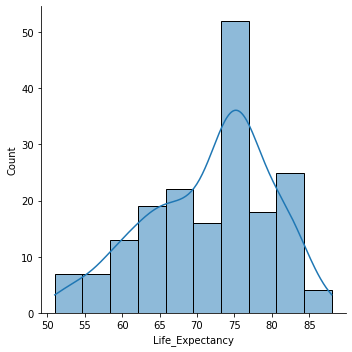

In [31]:
sns.displot(life_df['Life_Expectancy'],kde = True)
print('Skewness of our target attribute: ',skew(life_df['Life_Expectancy']))

The distribution of our target attribute is a left skewed distributed.(Negative Skewness) 

### 1.2. Checking the features 

- After removing the target, all remaining attributes are your features (independent variables).
- Discuss the shape of the feature data, how many rows and columns does it contain?
- Discuss whether features are standardised.

First we will fill out our missing data and then we will check out our features.
We are looking at the % of missing values in each column.

In [32]:
(life_df.isna().sum() *100) /life_df.shape[0]

Country                             0.000000
Status                              0.000000
Adult_Mortality                     0.000000
Infant_deaths                       0.000000
Alcohol                            96.721311
Percentage_expenditure              0.000000
Hepatitis_B                         4.918033
Measles                             0.000000
BMI                                 1.092896
Under_five_deaths                   0.000000
Polio                               0.000000
Total_expenditure                  98.907104
Diphtheria                          0.000000
HIV_AIDS                            0.000000
GDP                                15.846995
Population                         22.404372
Thinness_1_19_years                 1.092896
Thinness_5_9_years                  1.092896
Income_composition_of_resources     5.464481
Schooling                           5.464481
Life_Expectancy                     0.000000
dtype: float64

First we will look at the skewnewss of colummns that have less than 10% of missing values.

In [33]:
lessthan10 = ['Hepatitis_B', 'BMI', 'Thinness_1_19_years', 'Thinness_5_9_years', 'Income_composition_of_resources',
             'Schooling', 'GDP']

for a in lessthan10:
    print(a,': ',round(life_df[a].skew(),2))

Hepatitis_B :  -2.07
BMI :  -0.34
Thinness_1_19_years :  1.95
Thinness_5_9_years :  1.97
Income_composition_of_resources :  -0.34
Schooling :  -0.23
GDP :  2.87


Almost all of them are pretty skewed so for filling nan's, " Mode " should be the best option. As the distribution is not a normal distribution.

In [34]:
for a in lessthan10:
    life_df[a] = life_df[a].fillna(life_df[a].mode()[0])

Let's look at a heatmap for correlations between columns. We want see highly correlated columns to 'Alcohol', 'Total_expenditure', 'GDP', 'Population'.<br>

Beacuse those columns are having a higher % of missing values

Looking at the correlation heatmap in order to find any correlation that can help us filling missing values.

<AxesSubplot:>

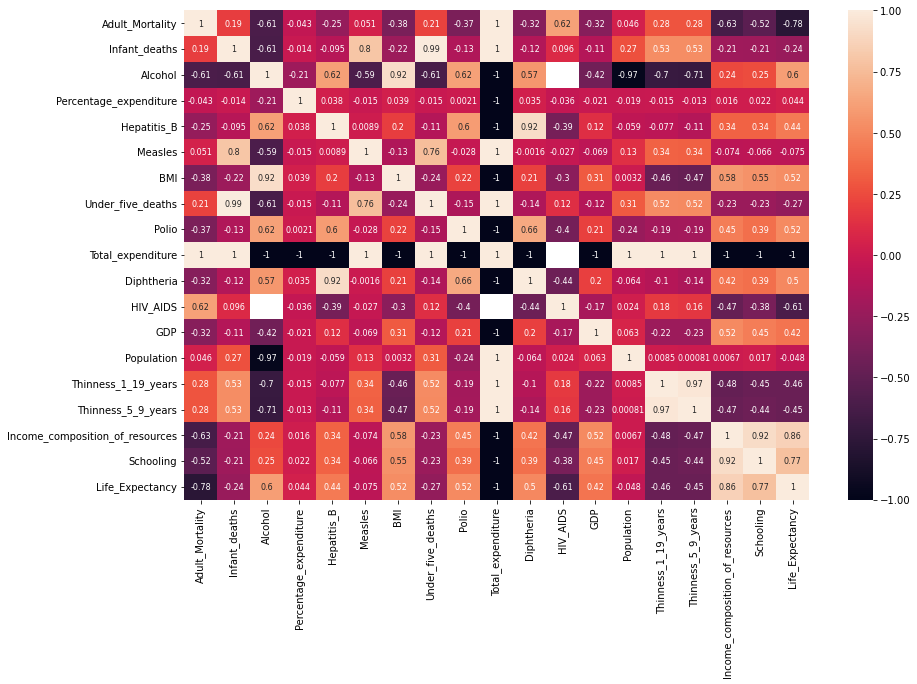

In [35]:
plt.figure(figsize=(14, 9))
sns.heatmap(life_df.corr(), annot=True, annot_kws={"fontsize":8})

Looking for the correlation between the 2 given features, possibly to fill GDP's missing value.

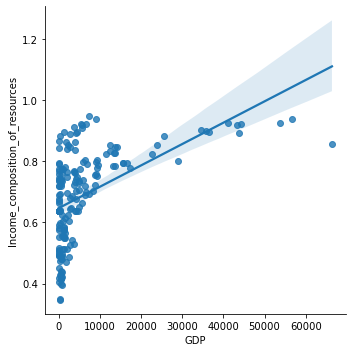

In [36]:
sns.lmplot(data=life_df, x='GDP', y='Income_composition_of_resources')

A lot of the are at the beginnning only so it is not a good idea to use this column to fill GDP's missing values.

In [37]:
# Removing the coloum country as it has very high cardinality.
del life_df['Country']

# Removing Alcohol column because so having high percentage of missing values.
del life_df['Alcohol']
del life_df['Population'] # Deleting population beacuse it is not highly correlated with any other feature.
del life_df['Total_expenditure']

In [39]:
map_dict = {'Developing':0, 'Developed':10}
life_df['Status'] = life_df['Status'].map(map_dict)
life_df.head()

,Status,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
10,0,263.0,62,71.279624,65.0,1154,19.1,83,6,65,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
11,0,74.0,0,364.975229,99.0,0,58.0,0,99,99,0.1,3954.227830,1.2,1.3,0.762,14.2,77.8
12,0,19.0,21,0.000000,95.0,63,59.5,24,95,95,0.1,4132.762920,6.0,5.8,0.743,14.4,75.6
13,0,335.0,66,0.000000,64.0,118,23.3,98,7,64,1.9,3695.793748,8.3,8.2,0.531,11.4,52.4
14,0,13.0,0,0.000000,99.0,0,47.7,0,86,99,0.2,13566.954100,3.3,3.3,0.784,13.9,76.4


Now we will check out our features, First we will Split our independent and dependent features

Here we will keep our target in 'y' and all the remaining attributes (independent variables) in 'x'.

In [40]:
x = life_df.iloc[:, :-1]
y = pd.DataFrame(life_df['Life_Expectancy'])

In [41]:
print('Number of rows in my feature data: ',x.shape[0],'\nNumber of columns in my feature data: ',x.shape[1])

Number of rows in my feature data:  183 
Number of columns in my feature data:  16


In [42]:
x.describe().loc[['mean', 'std']]

,Status,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
mean,1.748634,152.863388,23.803279,2.383906,83.240437,1502.901639,42.495628,31.612022,83.207650,84.633880,0.660656,6052.010079,4.506011,4.532240,0.688749,12.810929
std,3.808923,97.561184,83.683762,27.461032,23.681659,7842.394928,20.719012,107.779778,24.245778,22.162793,1.344702,11040.246284,4.086082,4.178359,0.149659,2.872433


None of our features are standardised, as they do not have a,<br>Mean closer to 0 and Standard Deviation closer to 1.

## 2. Training and testing a machine learning pipeline

- Propose a machine learning pipeline suited to predict the target, given the available features.
- Motivate your choices: why the proposed pipeline among the many?
- Explain whether your proposed pipeline standardises the feature data. Motivate your choices.
- Explain whether your proposed pipeline transforms feature data and how. Motivate your choices.
- Split your data needs into train and test.
- Train your supervised learning model.
- Show the accuracy of your model by using appropriate unseen data.
- Discuss whether you need to compare your accuracy to a baseline.
- Discuss whether your final model overfits or underfits.

In [43]:
# Creating an object for kFold cross validations with 5 splits.
kfold = KFold(n_splits = 5, shuffle=True, random_state=52)
kfold.get_n_splits(x)

5

Let's create a simple pipeline that will do cross validation 5 times, split the data into correct train and test sets and scale our data and then perform linear regression on that data and store the accuracy of each cross validation and present us a mean of all 5 folds.

In [44]:
r2_train_normal = []
r2_test_normal = []

for train, test in kfold.split(x):
    
    #Creating the train dataset
    x_train = x.iloc[train, :]
    y_train = y.iloc[train, :]
    
    #Creating the test dataset
    x_test = x.iloc[test, :]
    y_test = y.iloc[test, :]

    norm_pipe = Pipeline([('sc', StandardScaler()), # This is used to standardised our data 
                         ('lreg', LinearRegression())]) 
    
    norm_pipe.fit(x_train, y_train) # First performing standard scaler and then training a linear regression on that data.
    
    r2_train_normal.append(norm_pipe.score(x_train, y_train))
    r2_test_normal.append(norm_pipe.score(x_test, y_test))
    

print('Accuracy of our Linear Regression on Train set: ',np.round(np.mean(r2_train_normal)*100, 2), '%')
print('Accuracy of our Linear Regression on Test set: ',np.round(np.mean(r2_test_normal)*100, 2), '%')

Accuracy of our Linear Regression on Train set:  88.09 %
Accuracy of our Linear Regression on Test set:  54.23 %


As this is a regression task we particularly do not need to compare our model to a baseline model but we can.<br>We can do that by computing all the output as the mode (our target column is skewed so we choose mode instead of mean) of the target attribute and we can see that accuracy of our baseline model. An example is shown below. Sometimes this can be useful but most of the times people do not use a baseline model for regression tasks.

In [45]:
y_test_baseline = np.empty(36) # Creating an variable with 36 empty values (36 beacuse that is the size of our test dataset)

y_test_baseline.fill(int(y_test['Life_Expectancy'].mode()[0])) # Using Mode to fill it because our target variable has skewness.

print('Accuracy of our baseline model: ',np.round(r2_score(y_test, y_test_baseline)*100,2), '%')

Accuracy of our baseline model:  -95.43 %


The accuracy of our training dataset is '88%' and the accuracy of our testing dataset is '54%', there is a huge difference between both of these values, in addition to that, our training set accuracy is very close to 100%.<br>**So model surely is OVERFITTING**

## 3. Tuning the proposed machine learning pipeline (*Optional*) 

- Discuss whether your final feature space is low dimensional or high dimensional.
- Explain whether the proposed pipeline requires any fine-tuned phase.
- Explain whether your data needs to be split into train and test, k-fold, validation set, or what.
- Show how you tune your proposed pipeline and on which portion of the data.
- Introduce the hyper-parameters you are tuning. Motivate your choices. Why those hyper-parameters and not others? What's their role in the bias-variance trade-off?
- Validate your tuned model.
- Discuss whether your final tuned model overfits or underfits.
- Compare the accuracy of your final tuned model with the accuracy you got in the previous section (non-tuned model).

In [46]:
print('Here our number of rows is: ', x.shape[0],'\nand number of columns is: ',x.shape[1])
print('\nAccording to some brilliant people, number of rows should be 10 or even 50 times more than number of columns then only we can say that we are in low dimensionality')
print('\nOur number of rows is ',x.shape[0]/x.shape[1],' times more than the number of columns')
print('I can say that my feature space is high dimensionality')

Here our number of rows is:  183 
and number of columns is:  16

According to some brilliant people, number of rows should be 10 or even 50 times more than number of columns then only we can say that we are in low dimensionality

Our number of rows is  11.4375  times more than the number of columns
I can say that my feature space is high dimensionality


To solve the issue of high dimensionality and overfitting, we will use regularisation. Hence our pipeline will require a fine-tuned phase in order to get the best value of Lambda (alpha).

Our data needs to be splitted into train, test and validation sets. Train and test sets will be used to train various models and get the best one (best alpha). Validation set then will be used as unseen data to actually see how the best model of ours performs on it.

In [47]:
x_tune, x_val, y_tune, y_val = train_test_split(x, y, test_size=0.3, random_state=45)

In [48]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=45)
kfold.get_n_splits(x)

5

In [49]:
R2_train_tunned = []
R2_test_tunned = []
lambdas = np.logspace(-4, 10, 100)

for a in lambdas: # Iterating through different values to try as lambda
    
    R2_train_lambda = []
    R2_test_lambda = []
    
    for train, test in kfold.split(x_tune):
        
        # Creating the train dataset
        x_train = x_tune.iloc[train, :]
        y_train = y_tune.iloc[train, :]

        # Creating the test dataset
        x_test = x_tune.iloc[test, :]
        y_test = y_tune.iloc[test, :]

        tune_pipe = Pipeline([
        ('sc', StandardScaler()), # This scales our data
        ('Ridge', Ridge(alpha=a, tol=0.1, solver='svd'))]) # Our Ridge Regression
        
        #Scaling the data and training our Ridge Regression with various lambdas on each iteration
        tune_pipe.fit(x_train, y_train) 
        
        R2_train_lambda.append(tune_pipe.score(x_train, y_train))
        R2_test_lambda.append(tune_pipe.score(x_train, y_train))
    
    R2_train_tunned.append(np.mean(R2_train_lambda))
    R2_test_tunned.append(np.mean(R2_test_lambda))

In [50]:
# Creating a new dataframe in order to look at each value of lambda and it's accuracy on train and test dataset.
compare = pd.DataFrame({'Lambdas':lambdas,
                       'TrainingAcc': R2_train_tunned,
                       'TestingAcc': R2_test_tunned})
compare.head()

,Lambdas,TrainingAcc,TestingAcc
0,0.000100,0.891426,0.891426
1,0.000138,0.891426,0.891426
2,0.000192,0.891426,0.891426
3,0.000266,0.891426,0.891426
4,0.000368,0.891426,0.891426


In [51]:
compare['TestingAcc'].max()

0.8914258005591131

In [52]:
best_lambda = lambdas[np.argmax(R2_test_tunned)]
print("Best Value of lambda for our model:", best_lambda)

Best Value of lambda for our model: 0.0001


In [53]:
# Scaling our input variables
sc=StandardScaler()
sc.fit(x_tune)
x_tune_cols = x_tune.columns # Saving the column names of our input features for future purposes.
x_tune = sc.transform(x_tune)
x_val = sc.transform(x_val)

best_ridge = Ridge(alpha=best_lambda, tol=0.01)
best_ridge.fit(x_tune, y_tune)

print('Accuracy of tuned Ridge Regression on Tunning Dataset: ',np.round(best_ridge.score(x_tune, y_tune), 2), '%')
print('Accuracy of tuned Ridge Regression on Validation (unseen) Dataset: ',np.round(best_ridge.score(x_val, y_val), 2), '%')

Accuracy of tuned Ridge Regression on Tunning Dataset:  0.89 %
Accuracy of tuned Ridge Regression on Validation (unseen) Dataset:  0.82 %


The Scores of our ridge regression shows us a very well balance between bias and variance. The accuracy between both our training and validation set is almost similar (very small difference). I would say that we have found the best trade-off between bias and variance with the given dataset.

In [54]:
print('Accuracy of our Linear Regression on Train set: ',np.round(np.mean(r2_train_normal)*100, 2), '%')
print('Accuracy of our Linear Regression on Test set: ',np.round(np.mean(r2_test_normal)*100, 2), '%')
print('-------------------------------------------------------------------------------------------------')
print('Accuracy of our Ridge Regression on train set: ',np.round(best_ridge.score(x_tune, y_tune)*100, 2), '%')
print('Accuracy of our Ridge Regression on test set: ',np.round(best_ridge.score(x_val, y_val)*100, 2), '%')

Accuracy of our Linear Regression on Train set:  88.09 %
Accuracy of our Linear Regression on Test set:  54.23 %
-------------------------------------------------------------------------------------------------
Accuracy of our Ridge Regression on train set:  88.81 %
Accuracy of our Ridge Regression on test set:  82.25 %


A huge improvement when compared to our initial Linear Regression.

## 4. Model interpretation (*Optional*)

- Explain whether your proposed pipeline is human interpretable.
- Discuss whether features contain any multicollinearity and if this is a problem for your model interpretability.
- Perform any analysis necessary to show which features are most responsible for generating the final predictions.
- Feel free to add visualisations to support your claims.
- Feel free to comment on the stability of your findings.

My porposed pipeline is human interpretable because it is simple, straight to point and has only a few tasks to perform. First it iterates over all the different lambdas and for each lambda it stores different scores of each Kfold (out of 5) over tuning set, after that by looking at mean score of each lambda for cross validation, we find the value of lambda which shows us the best accuracy for testing set.

Visualizing the correlation between of features to identiffy multicollinearity. 
Columns such as <br>
 - #### 'Infant Deaths & Under five deaths'
 - #### 'Hepatitis B & Diphtheria'
 - #### 'Thinness 1 19 years & Thinness 5 9 Years'
 - #### 'Income composition of resources & Schooling'<br>
 
Are highly correlated amongst eachother

<AxesSubplot:>

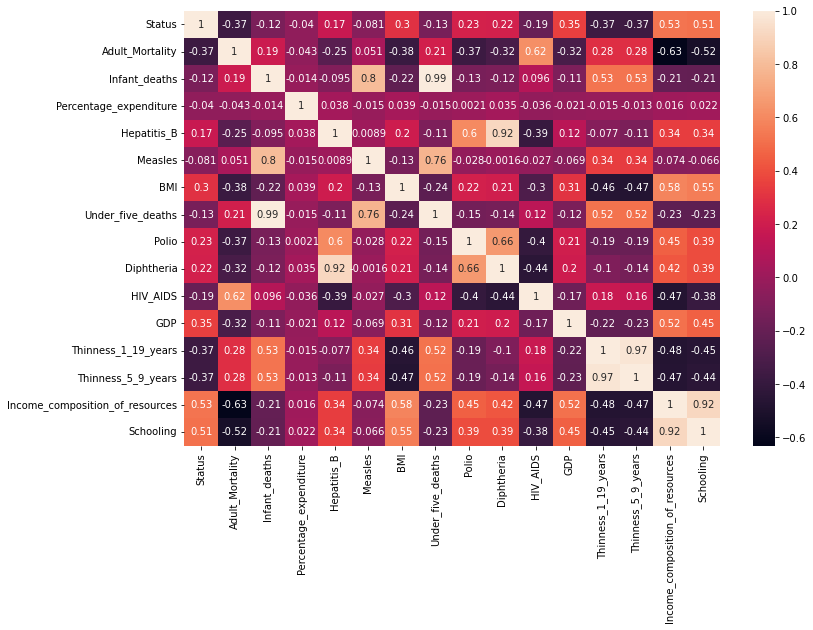

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(x.corr(), annot=True)

Although features are highly correlated to eachother, by using regularisation (L2), only important columns will have high importance, other one will have almost 0 importance. As ridge regression tries to keep as many features as possible.

In [58]:
# Creating a dataframe in order to view beta coefficient of each input feature.
coef = best_ridge.coef_.squeeze()
coeffs = pd.DataFrame({'Columns':x_tune_cols,
                      'Values':coef})
coeffs

,Columns,Values
0,Status,0.625231
1,Adult_Mortality,-2.412644
2,Infant_deaths,3.657678
3,Percentage_expenditure,0.095756
4,Hepatitis_B,1.277688
5,Measles,-0.163646
6,BMI,-0.319073
7,Under_five_deaths,-3.763169
8,Polio,0.143925
9,Diphtheria,-0.368356


Visualizing the coeficients to understand better, the further away the values are from 0 the more affect it has on the output. The close to 0 the less affect on the output.

Text(0, 0.5, 'Values')

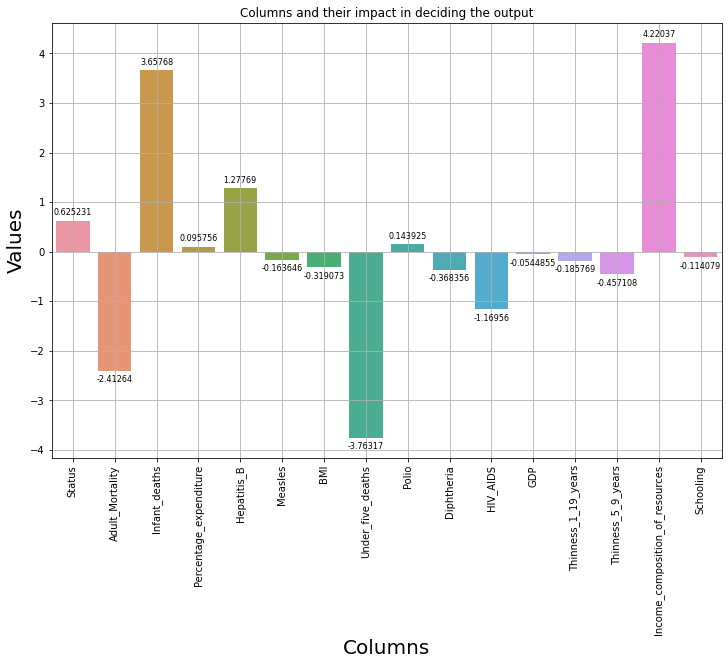

In [62]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=coeffs, x='Columns', y='Values')
plt.xticks(rotation=90)
plt.grid(True)
ax.bar_label(ax.containers[0], padding=4, fontsize=8)
plt.title('Columns and their impact in deciding the output')
ax.set_xlabel("Columns",fontsize=20)
ax.set_ylabel("Values",fontsize=20)

Features such as 'Under Five Deaths' and 'Income Composition of resources' and 'Infant Deaths' are the mostly responsible for the output. Although 'Under Five Deaths and Infant Deaths' are highly correlated to eachother so that can affect human interpretability. As they both have almost same beta's coefficients but one is positive and the other one is negative.<br>
So it can be said that 'Income Composition of resources' is the most important variable for prediction.

#### Let's take a look at the stability of our model.

In [63]:
# Creating a dataframe in order to visualise our residuals with actual and predicted values.
results_ridge = pd.DataFrame({'Actual Values':y_val['Life_Expectancy'].values,
                             'Predictions':best_ridge.predict(x_val).squeeze()})

results_ridge['Residuals'] = results_ridge['Actual Values'] - results_ridge['Predictions']
results_ridge.head()

,Actual Values,Predictions,Residuals
0,76.1,75.287523,0.812477
1,74.3,72.393510,1.906490
2,67.0,57.253452,9.746548
3,68.7,68.866249,-0.166249
4,85.0,78.623623,6.376377


Checking the normality of our residuals as it is first assumption of residuals and indicates the stability of our model as well.<br>
And it seems to be having almost a normal distribution.

Text(0.5, 1.0, 'Normality of Residuals')

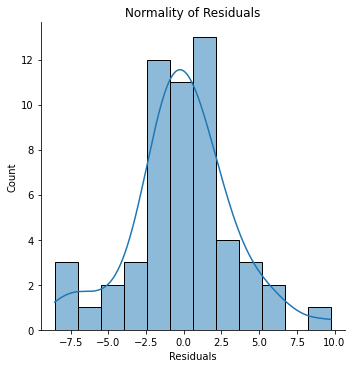

In [64]:
sns.displot(results_ridge, x='Residuals', kde = True)
plt.title('Normality of Residuals')

Correlation between Actual values and residuals:  0.47803688236889674


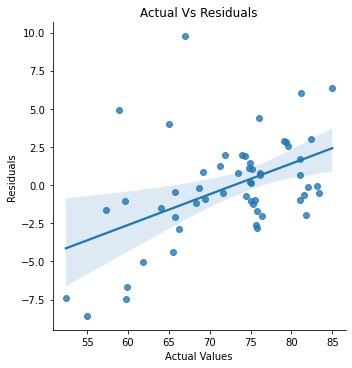

In [65]:
# Creating a plot to see the trend between actual values and residuals for checking the assumption of independence 
# of residuals
sns.lmplot(data = results_ridge, x='Actual Values', y='Residuals')
plt.title("Actual Vs Residuals")
print('Correlation between Actual values and residuals: ',results_ridge['Actual Values'].corr(results_ridge['Residuals']))

Correlation between predicted values and residuals:  0.064743154905964


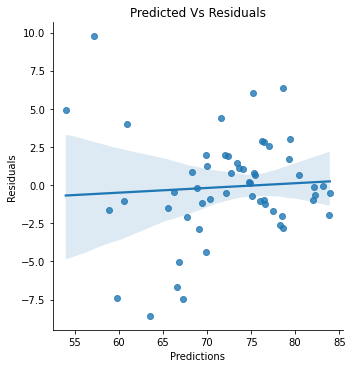

In [66]:
# Creating a plot to see the trend between predicted values and residuals for checking the assumption of independence 
# of residuals
sns.lmplot(data = results_ridge, x='Predictions', y='Residuals')
plt.title("Predicted Vs Residuals")
print('Correlation between predicted values and residuals: ',results_ridge['Predictions'].corr(results_ridge['Residuals']))

- Stability :- 

 - Model is pretty stable as the train and test accuraies are pretty close to eachother and they are high as well.
in terms of trends between residuals with actual values and predicted values.<br>
 - Actual values and residuals has decent amount of correlation with eachother.
That can be possibly brought down by adding more features to our dataset and also more observations as well (number of observations in our dataset is quite low).
 - So our model cannot be yet used for hypothesis testing because of our features being correlated to eacother but it is performing well for predictions with R2 of 82% on unseen data and can be used for predictions.

## 4. Discussion: pros/cons and time complexity of the designed pipeline

- Summarise the introduced pipeline in your own words.
- Introduce the time complexity of the full introduced pipeline.
- Discuss which are the steps having the highest impact on time execution, especially to handle a larger dataset.
- Present its strengths and limitations.
- Discuss any possible way to improve it. 


The introduced pipleline i will be talking about is the tunning one.<br>
Our pipeline is constructed in a way to find the best alpha (lambda) value for our Ridge Regression and it also uses kFold cross validaiton so we can be sure of that the result we are getting is consistent on different set of observations. Our data also gets standarised before it is passed to our model for training. In the end a mean score of 5 cross validation of each lambda is saved.

### Time Complexity
- For this we again will only talk about our tunning pipeline. <br>
- For loop for lambdas - 100 (runs only 100 times) but for more better understanding we will use C1 as the number of lambdas<br>
- For loop for Cross validations - 5 (runs only 5 times because we are doing cross validation 5 times) but for more better understanding we will use C2 as the number of kFold's<br>


- Standard Scaler :-<br>
 - Mean - O(N)<br>
 - Standard deviation - O(N)<br>
 - And going over each obs is O(N)<br>
 - In total it is O(3N) and if we have 3 times faster computer (dropping the constant) so we can do standard Scaling in O(N) and we will use N for it, in final time complexity.


- Ridge Regression :-<br>
 - As here we are in high dimensionality as our number if observations is not 50 times numbere of columns so we are in high dimensionality (m>n).<br>
 - Hence, O(m * n^2)


- First Append method for CV score - 10 (5 times for taining set score and 5 times for testing set score)<br>
- Secondd Append method for Mean CV score of each lambda - 5 (Only 5 scores set eachtime to calculate mean of it)

#### Main Time Complexity of tunning pipeline:- 
- Putting everything together = C1 * C2 * ( N + (M * N^2) + 10 + 5 )
- After removing constants our Final Time Complexity = O(C1 * C2 * N + M * N^2)


#### Highest Impact on time
Our highest time consuming part of our pipeline comes from the number rows (observations) present in our dataset. Although choosing a smaller number of kFold's and alpha will be better, increasing them will increase the time taken to run the pipeline significantly.

#### Strenght and limitations

- Strenght
 - The Main Strenght of my pipeline is that we can find the optimal lambda value for our dataset out of the given options for lambda while making sure that the results are even over different datasets (kFold cross validation).<br>
 
 
- Limitations 
 - The limitation of my pipeline is that if i want to tune another parameter in the same pipeline, it won't work. Also label encoding is also not used in the pipeline.

####  Possible way to improve it

Creating multiple pipelines and finding the optimal value of one hyper-parameter. And then we use that to find the best value for the other hyper-parameter, using our second pipeline. (Not Great for Large Datasets).

Also, removing skewness from our target variable and from input's too, could help alot as well.